In [8]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [9]:
# device = torch.device('cpu')
# device

In [10]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
import ta as ta


In [5]:
# import yfinance as yf

# # Define the ticker symbol
# ticker_symbol = "^GSPC"

# # Get data on this ticker
# sp500_data = yf.Ticker(ticker_symbol)

# # Get historical market data
# historical_data = sp500_data.history(interval="1m", start="2024-05-20", end="2024-05-27")



In [12]:
import requests
import pandas as pd

api_key = 'XPQXF0VKO06IFUEJ'
symbol = 'TSLA'
interval = '1min'
outputsize = 'full'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&outputsize={outputsize}&apikey={api_key}'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['Time Series (1min)']).T
df.columns = ['open', 'high', 'low', 'close', 'volume']
df.index = pd.to_datetime(df.index)
historical_data = df.astype(float)



In [13]:
data = historical_data
data

,open,high,low,close,volume
2024-06-17 19:59:00,187.500,187.80,187.47,187.770,18512.0
2024-06-17 19:58:00,187.490,187.52,187.45,187.450,5954.0
2024-06-17 19:57:00,187.410,187.50,187.39,187.490,7039.0
2024-06-17 19:56:00,187.395,187.44,187.37,187.410,2553.0
2024-06-17 19:55:00,187.400,187.44,187.37,187.395,2152.0
...,...,...,...,...,...
2024-05-20 04:04:00,177.980,178.05,177.88,177.960,2298.0
2024-05-20 04:03:00,177.850,178.00,177.80,177.950,1479.0
2024-05-20 04:02:00,177.710,177.85,177.66,177.810,1985.0
2024-05-20 04:01:00,177.780,177.89,177.67,177.700,1073.0


In [ ]:
## lstm prediction 

import torch
import torch.nn as nn

class StockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockPredictor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to('cuda')
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to('cuda')

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out




# Now you can use the StockPredictor class
input_size = 5  # Number of features
hidden_size = 64
num_layers = 2
output_size = 1

model = StockPredictor(input_size, hidden_size, num_layers, output_size).to('cuda')
model_path = r"C:\Users\srija\Assignment\AutoTrader\LSTM_TSLA\stock_predictor_lstm_model.pth"
model.load_state_dict(torch.load(model_path))
model.eval()

In [14]:
import pandas as pd
import ta

# Load your stock data


# Calculate technical indicators
data['MA50'] = ta.trend.sma_indicator(data['close'], window=15)
data['RSI'] = ta.momentum.rsi(data['close'], window=15)
data['MACD'] = ta.trend.macd(data['close'])
data['BB_upper'] = ta.volatility.bollinger_hband(data['close'])
data['BB_lower'] = ta.volatility.bollinger_lband(data['close'])
data['ADX'] = ta.trend.adx(data['high'], data['low'], data['close'])
data['CCI'] = ta.trend.cci(data['high'], data['low'], data['close'])
data['ATR'] = ta.volatility.average_true_range(data['high'], data['low'], data['close'])
data['ROC'] = ta.momentum.roc(data['close'])
data['OBV'] = ta.volume.on_balance_volume(data['close'], data['volume'])

# Drop rows with NaN values (resulting from the indicator calculation)
data = data.dropna()

# Add more indicators as needed

# Drop rows with NaN values (resulting from the indicator calculation)
historical_data = data


In [15]:

# historical_data = historical_data[1:]
historical_data

,open,high,low,close,volume,MA50,RSI,MACD,BB_upper,BB_lower,ADX,CCI,ATR,ROC,OBV
2024-06-17 19:34:00,187.30,187.32,187.20,187.200,1602.0,187.297600,21.633818,-0.093997,187.453278,187.190622,0.000000,-108.454371,0.091095,-0.064061,7997.0
2024-06-17 19:33:00,187.35,187.35,187.28,187.280,308.0,187.290267,36.688789,-0.086947,187.440440,187.189960,0.000000,-15.385362,0.095303,-0.029359,8305.0
2024-06-17 19:32:00,187.35,187.35,187.28,187.300,357.0,187.286267,39.787230,-0.078837,187.432968,187.189432,56.336275,-0.619771,0.093496,-0.021352,8662.0
2024-06-17 19:31:00,187.31,187.35,187.28,187.335,467.0,187.287267,44.848089,-0.068792,187.423368,187.192532,53.330518,24.675972,0.091817,-0.002135,9129.0
2024-06-17 19:30:00,187.29,187.35,187.27,187.310,450.0,187.285600,42.137641,-0.062133,187.413091,187.194809,50.835556,12.612532,0.090973,-0.005338,8679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20 04:04:00,177.98,178.05,177.88,177.960,2298.0,178.193333,42.888933,-0.036370,178.620641,177.810359,21.892374,-89.818182,0.173197,-0.336022,12724060.0
2024-05-20 04:03:00,177.85,178.00,177.80,177.950,1479.0,178.162000,42.492962,-0.044136,178.601468,177.782532,22.541979,-96.323333,0.175111,-0.291365,12722581.0
2024-05-20 04:02:00,177.71,177.85,177.66,177.810,1985.0,178.122000,37.324060,-0.060885,178.599672,177.730328,23.921417,-129.742689,0.183318,-0.297185,12720596.0
2024-05-20 04:01:00,177.78,177.89,177.67,177.700,1073.0,178.064667,33.857026,-0.082089,178.621650,177.662350,24.734081,-118.861465,0.185938,-0.397960,12719523.0


In [16]:
historical_data = historical_data.drop(['open', 'high','low'], axis=1)

<Axes: >

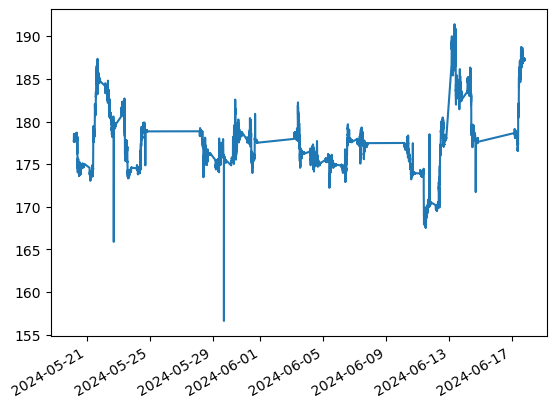

In [17]:
historical_data['close'].plot()

In [18]:
historical_data

,close,volume,MA50,RSI,MACD,BB_upper,BB_lower,ADX,CCI,ATR,ROC,OBV
2024-06-17 19:34:00,187.200,1602.0,187.297600,21.633818,-0.093997,187.453278,187.190622,0.000000,-108.454371,0.091095,-0.064061,7997.0
2024-06-17 19:33:00,187.280,308.0,187.290267,36.688789,-0.086947,187.440440,187.189960,0.000000,-15.385362,0.095303,-0.029359,8305.0
2024-06-17 19:32:00,187.300,357.0,187.286267,39.787230,-0.078837,187.432968,187.189432,56.336275,-0.619771,0.093496,-0.021352,8662.0
2024-06-17 19:31:00,187.335,467.0,187.287267,44.848089,-0.068792,187.423368,187.192532,53.330518,24.675972,0.091817,-0.002135,9129.0
2024-06-17 19:30:00,187.310,450.0,187.285600,42.137641,-0.062133,187.413091,187.194809,50.835556,12.612532,0.090973,-0.005338,8679.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20 04:04:00,177.960,2298.0,178.193333,42.888933,-0.036370,178.620641,177.810359,21.892374,-89.818182,0.173197,-0.336022,12724060.0
2024-05-20 04:03:00,177.950,1479.0,178.162000,42.492962,-0.044136,178.601468,177.782532,22.541979,-96.323333,0.175111,-0.291365,12722581.0
2024-05-20 04:02:00,177.810,1985.0,178.122000,37.324060,-0.060885,178.599672,177.730328,23.921417,-129.742689,0.183318,-0.297185,12720596.0
2024-05-20 04:01:00,177.700,1073.0,178.064667,33.857026,-0.082089,178.621650,177.662350,24.734081,-118.861465,0.185938,-0.397960,12719523.0


In [19]:
historical_data_reversed_rows = historical_data.iloc[::-1].reset_index(drop=True)
print(historical_data_reversed_rows)


         close  volume        MA50        RSI      MACD    BB_upper  \
0      177.700  3800.0  178.013333  33.857026 -0.097766  178.637987   
1      177.700  1073.0  178.064667  33.857026 -0.082089  178.621650   
2      177.810  1985.0  178.122000  37.324060 -0.060885  178.599672   
3      177.950  1479.0  178.162000  42.492962 -0.044136  178.601468   
4      177.960  2298.0  178.193333  42.888933 -0.036370  178.620641   
...        ...     ...         ...        ...       ...         ...   
19167  187.310   450.0  187.285600  42.137641 -0.062133  187.413091   
19168  187.335   467.0  187.287267  44.848089 -0.068792  187.423368   
19169  187.300   357.0  187.286267  39.787230 -0.078837  187.432968   
19170  187.280   308.0  187.290267  36.688789 -0.086947  187.440440   
19171  187.200  1602.0  187.297600  21.633818 -0.093997  187.453278   

         BB_lower        ADX         CCI       ATR       ROC         OBV  
0      177.604013  27.366330 -115.244661  0.259085 -0.342101  12723323.0

In [20]:
historical_data = historical_data_reversed_rows

In [21]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random


In [22]:
import gym
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    def __init__(self, df):
        super(StockTradingEnv, self).__init__()
        
        self.df = df
        self.current_step = 0
        self.prev_step =0
        self.balance = 1000000
        self.shares_held = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.max_steps = len(df) - 1
        
        self.action_space = gym.spaces.Discrete(3)  # 0: Hold, 1: Buy, 2: Sell
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(12,), dtype=np.float32)

        self.No_of_transactions =0
        
    
    def reset(self):
        self.current_step = 0
        self.prev_step =0
        self.balance = 1000000
        
        self.shares_held = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.No_of_transactions =0

        return self._get_observation()
    
    def _get_observation(self):
        return np.array([
            # self.balance,
            # self.shares_held,
            # # self.total_shares_sold,
            # self.total_sales_value,
            self.df.iloc[self.current_step]['close'],
            self.df.iloc[self.current_step]['volume'],
            self.df.iloc[self.current_step]['MA50'],
            self.df.iloc[self.current_step]['RSI'],
            self.df.iloc[self.current_step]['MACD'],
            
            self.df.iloc[self.current_step]['BB_upper'],
            self.df.iloc[self.current_step]['BB_lower'],
            self.df.iloc[self.current_step]['ADX'],
            self.df.iloc[self.current_step]['CCI'],
            self.df.iloc[self.current_step]['ATR'],
            self.df.iloc[self.current_step]['ROC'],
            self.df.iloc[self.current_step]['OBV']
        
        ])
    def _get_primary_observations(self):
        return np.array([
            self.balance,
            self.shares_held,
            self.No_of_transactions,
          
          
            
        
        ])
    
    # def step(self, action):
    #     current_price = self.df.iloc[self.current_step]['close']
      
    #     prev_val = self.balance + self.shares_held*self.df.iloc[self.prev_step]['close']
        
    #     reward =0
    #     if action == 1:  # Buy
    #         self.shares_held += self.balance // current_price
    #         self.balance %= current_price
    #         self.prev_step = self.current_step
    #         reward =0
        
    #     elif action == 2:  # Sell
    #         if(self.shares_held!=0):
    #             self.No_of_transactions +=1
    #         self.balance += self.shares_held * current_price
    #         self.total_shares_sold += self.shares_held
    #         self.total_sales_value += self.shares_held * current_price
    #         self.shares_held = 0
    #         reward = self.balance  -prev_val
        
    #     self.current_step += 1
    #     done = self.current_step >= self.max_steps
    #     # reward = self.balance + self.shares_held * current_price + self.total_sales_value
       
        
    #     return self._get_observation(), reward, done, {}
    
    def render(self, mode='human'):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Total sales value: {self.total_sales_value}')

# Example usage
data = historical_data
env = StockTradingEnv(data)


In [23]:
def get_state(df,step):
    return np.array([
            # self.balance,
            # self.shares_held,
            # # self.total_shares_sold,
            # self.total_sales_value,
           df.iloc[step]['close'],
           df.iloc[step]['volume'],
           df.iloc[step]['MA50'],
           df.iloc[step]['RSI'],
           df.iloc[step]['MACD'],
           df.iloc[step]['BB_upper'],
           df.iloc[step]['BB_lower'],
           df.iloc[step]['ADX'],
           df.iloc[step]['CCI'],
           df.iloc[step]['ATR'],
           df.iloc[step]['ROC'],
           df.iloc[step]['OBV']
        
        ]) 

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim

class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16,32)
        self.fc3 = nn.Linear(32,64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,8)
        self.fc7 = nn.Linear(8,4)
        self.fc8 = nn.Linear(4, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = self.fc8(x)
        return x


In [25]:

# Example usage
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n
policy_net = DQN(input_dim, output_dim)
target_net = DQN(input_dim, output_dim)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
input_dim

12

In [30]:
import random
from collections import deque

class DQNAgent:
    def __init__(self, env, policy_net, target_net, batch_size=4096, gamma=0.99, epsilon_start=1.0, epsilon_end=0.01, epsilon_decay=0.995):
        self.env = env
        self.policy_net = policy_net
        self.target_net = target_net
        self.batch_size = batch_size
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.memory = deque(maxlen=10000)
        self.optimizer = optim.Adam(policy_net.parameters())
        self.loss_fn = nn.MSELoss()
    
    def select_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        with torch.no_grad():
            state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
            q_values = self.policy_net(state)
            return q_values.argmax().item()
    
    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def sample_memory(self):
        return random.sample(self.memory, self.batch_size)
    
    def update_policy(self):
        if len(self.memory) < self.batch_size:
            return
        
        transitions = self.sample_memory()
        batch = list(zip(*transitions))
        states =np.array(batch[0])

        states = torch.tensor(states, dtype=torch.float32).to(device)
        actions = torch.tensor(batch[1], dtype=torch.long).unsqueeze(1).to(device)
        rewards = torch.tensor(batch[2], dtype=torch.float32).unsqueeze(1).to(device)
        next_states = np.array(batch[3])
        next_states = torch.tensor(next_states, dtype=torch.float32).to(device)
        dones = torch.tensor(batch[4], dtype=torch.float32).unsqueeze(1).to(device)

        
        current_q_values = self.policy_net(states).gather(1, actions)
        max_next_q_values = self.target_net(next_states).max(1)[0].unsqueeze(1)
        expected_q_values = rewards + self.gamma * max_next_q_values * (1 - dones)
        
        loss = self.loss_fn(current_q_values, expected_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)

# Example usage



In [31]:
policy_net.load_state_dict(torch.load(r"C:\Users\srija\Assignment\AutoTrader\DQN_TSLA\dqn_model_Sell_short_TSLA 2588.pth"))
target_net.load_state_dict(torch.load(r"C:\Users\srija\Assignment\AutoTrader\DQN_TSLA\dqn_model_Sell_short_TSLA 2588.pth"))
policy_net.to(device)
target_net.to(device)
agent = DQNAgent(env, policy_net, target_net)

In [32]:
import os
import torch

# Define the path where the model will be saved
save_folder = r"C:\Users\srija\Assignment\AutoTrader\DQN_TSLA"



In [1]:
num_episodes = 8000
from tqdm import tqdm
for episode in range(7100,num_episodes):
    # state = env.reset()
    total_reward = 0
    number_trans = 0
    wins =0
    lose = 0
    balance = 1000000
    
    pbar = tqdm(total = len(historical_data))
    step =0
    while step<len(historical_data):
    
        pbar.update(1)
        
        shares_held = 0
        shares_sold =0
        state = get_state(historical_data,step)
        action = agent.select_action(state)
        done = False
        # print(action)
        current_price = historical_data.iloc[step]['close']
        if action ==1: ## BUY
            prev_balance  = balance
            shares_held = balance//current_price
            balance %= current_price
            for tem_step in range(step,step+1800):
                if tem_step == len(historical_data)-1:
                    balance = balance + shares_held*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    step = tem_step
                    
                    break
                if historical_data.iloc[tem_step]['close']>=1.007*current_price:
                    balance = balance + shares_held*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    wins +=1
                    step = tem_step
                    
                    break
                ### Stop loss 
                if historical_data.iloc[tem_step]['close']<=0.995*current_price: 
                    balance = balance + shares_held*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    step = tem_step
                    lose += 1
                    break
             
            if step == len(historical_data)-1:
                done = True
            number_trans +=1
            reward =  balance -prev_balance
            total_reward += reward
            agent.store_transition(state, action, reward, next_state, done)
            agent.update_policy()
        
        if action==2: ## Sell  short
            prev_balance = balance
            No_shares_sold = 0.8*balance//current_price
            shares_sell = No_shares_sold*current_price
            balance = balance - shares_sell
            for tem_step in range(step,step+1800):
                if tem_step == len(historical_data)-1:
                    shares_buy = No_shares_sold*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    step = tem_step
                    break
                if historical_data.iloc[tem_step]['close']>=1.005*current_price:
                    shares_buy =  No_shares_sold*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    step = tem_step
                    lose +=1
                    break
                ### Stop loss 
                if historical_data.iloc[tem_step]['close']<=0.993*current_price: 
                    shares_buy =  No_shares_sold*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    wins +=1
                    step = tem_step
                    break
            
            if step == len(historical_data)-1:
                done = True
            number_trans +=1
            reward =  shares_sell -shares_buy
            balance = balance + reward
            total_reward += reward
            agent.store_transition(state, action, reward, next_state, done)
            agent.update_policy()
       


        

        step +=1
    pbar.close()



            
        # next_state, reward, done, _ = env.step(action)
        # balance,shares_held,no_oftrans = env._get_primary_observations()
        
        # agent.store_transition(state, action, reward, next_state, done)
        # agent.update_policy()
        # state = next_state
        # total_reward += reward
        # print(f'Episode {episode + 1}, Total Reward: {total_reward}')
        
        
    print(f'Episode {episode + 1}, Total Reward: {total_reward}')
    print(f'Number of transcations: {number_trans}, Wins: {wins}, Lose: {lose} ')
            
    
    # Update the target network
    if episode % 10 == 0:
        target_net.load_state_dict(policy_net.state_dict())
    model_save_path = os.path.join(save_folder, f'dqn_model_Sell_short_TSLA {episode+1}.pth')

    # Save the model state_dict
    torch.save(policy_net.state_dict(), model_save_path)
    


# Save the trained model


NameError: name 'historical_data' is not defined